In [4]:
!pip install xlrd==1.2.0


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('datasets/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df.head()

ModuleNotFoundError: No module named 'pandas'

In [7]:
# Calcul du pourcentage de valeurs nulles :(somme des valeurs par colonne => somme de seuile / taille df)
df.isna().sum().sum()/len(df)

0.05492730210016155

In [26]:
# pays avec le plus grand nombre de cas(regrouper par pays => somme de cas par pays)
df.groupby('countriesAndTerritories')[['cases', 'deaths']].sum()

,cases,deaths
countriesAndTerritories,,
Afghanistan,49273,1971
Albania,48530,1003
Algeria,92102,2596
Andorra,7338,79
Angola,16188,371
...,...,...
Wallis_and_Futuna,3,0
Western_Sahara,766,1
Yemen,2083,606


In [30]:
# pays avec le plus grand nombre de cas(regrouper par pays => somme de cas par pays triés par cas)
df_by_country= df.groupby('countriesAndTerritories')[['cases', 'deaths']].sum().sort_values('cases', ascending=False)
df_by_country.head()

,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911


In [32]:
#pays avec taux de moralié élevé(nombre de morts / nombre de cas )
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']
df_by_country.head()

,cases,deaths,mortality_rate
countriesAndTerritories,,,
United_States_of_America,16256754,299177,0.018403
India,9884100,143355,0.014504
Brazil,6901952,181402,0.026283
Russia,2653928,46941,0.017687
France,2376852,57911,0.024365


Text(0.5, 1.0, 'Countries with highest mortality rates')

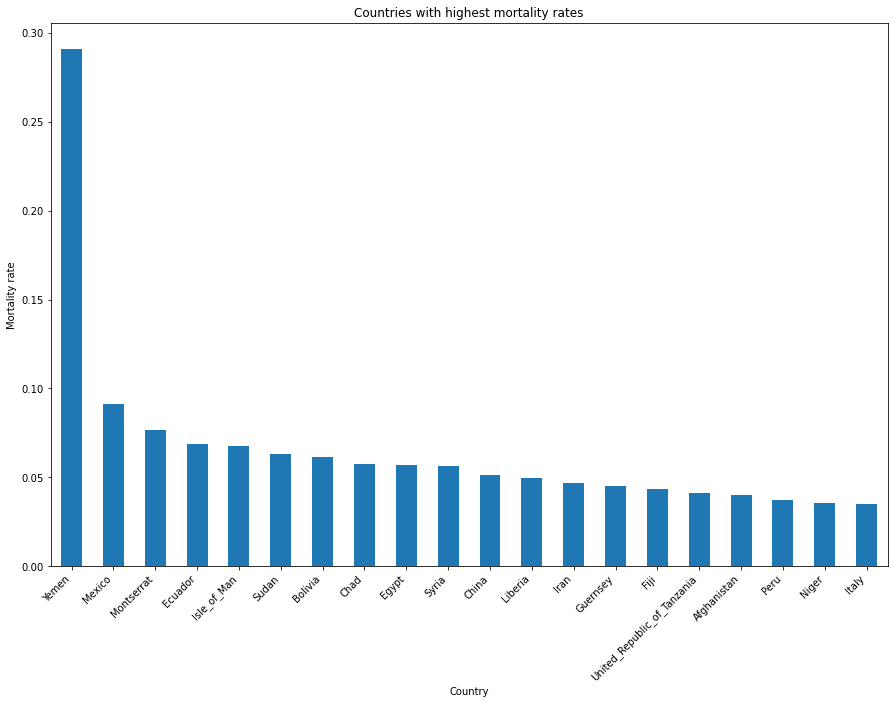

In [33]:
#Trier les valeurs du taux de mortalité par ordre décroissant
plt.figure(figsize=(15,10))
ax = df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

In [36]:
#Effet de confinement sur le nombre de cas ( regrouper par mois)
df_by_month = df.groupby('month')[['cases','deaths']].sum()
df_by_month

,cases,deaths
month,,
1,9799,213
2,75422,2708
3,723738,35814
4,2339594,189180
5,2891996,140142
6,4249525,134069
7,7067524,166195
8,7963836,178618
9,8456248,162169


Text(0, 0.5, 'Nombre de morts')

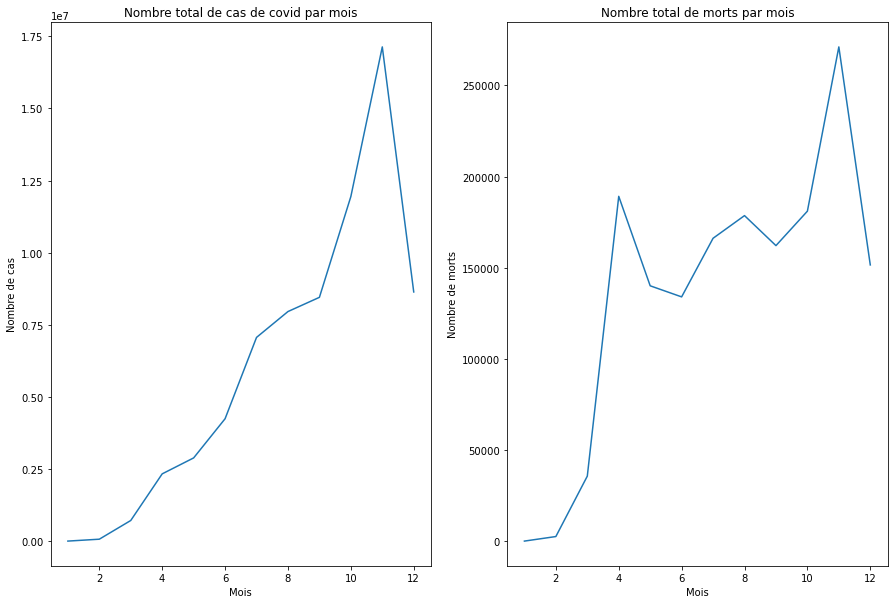

In [37]:
# deux plots : nombre de cas par mois et nombre de morts par mois
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")
df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")

In [39]:
# Prénons un cas d'un pays précis

In [5]:
df_tunisia = df[df.countriesAndTerritories == 'Tunisia']
df_tunisia_monthwise = df_tunisia.groupby('month')[['cases','deaths']].sum()
df_tunisia_grouped = df_tunisia_monthwise.reset_index()
df_tunisia_grouped

,month,cases,deaths
0,3,312,8
1,4,668,32
2,5,96,8
3,6,96,2
4,7,342,0
5,8,2171,26
6,9,13720,170
7,10,42408,1071
8,11,36438,1902
9,12,15110,675


In [48]:
# France
df_france = df[df.countriesAndTerritories == 'France']
df_france_monthwise = df_france.groupby('month')[['cases','deaths']].sum()
df_france_grouped = df_france_monthwise.reset_index()
df_france_grouped

,month,cases,deaths
0,1,6,0
1,2,51,2
2,3,44493,3022
3,4,83892,21063
4,5,23054,4684
5,6,12764,1042
6,7,22313,441
7,8,91370,352
8,9,272747,1287
9,10,781294,4672


Text(0.5, 1.0, 'Evolution du covid en France')

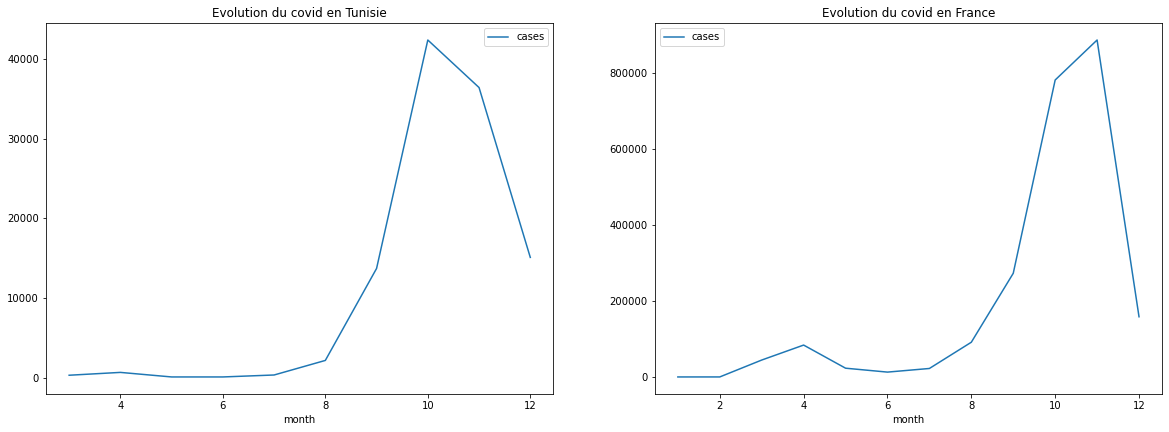

In [51]:
fig=plt.figure(figsize=(20,15))

ax3=fig.add_subplot(2,2,1)
df_tunisia_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Evolution du covid en Tunisie")

ax2=fig.add_subplot(2,2,2)
df_france_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Evolution du covid en France")




In [53]:
#Regroupons par Continent (Europe, Afrique, Asie ...) ==> Continent qui a le grand nombre de cas
df['continentExp'].value_counts()

Europe     17372
Africa     14981
America    13742
Asia       13241
Oceania     2500
Other         64
Name: continentExp, dtype: int64

In [55]:
#Somme pour chaque continent triés par cas
df.groupby('continentExp')[['cases', 'deaths']].sum().sort_values('cases', ascending=False)

,cases,deaths
continentExp,,
America,30887593,785420
Europe,21400012,479789
Asia,16782046,290129
Africa,2379827,56334
Oceania,53440,1154
Other,696,7


In [7]:
#Somme pour chaque continent triés par nombre de morts
df_c = df.groupby('continentExp')[['cases', 'deaths']].sum().sort_values('cases', ascending=False)
df_c

,cases,deaths
continentExp,,
America,30887593,785420
Europe,21400012,479789
Asia,16782046,290129
Africa,2379827,56334
Oceania,53440,1154
Other,696,7


In [8]:
#Taux de mortalité dans chaque continent
df_c['moratlity_rate'] = df_c['deaths'] / df_c['cases']
df_c.sort_values('moratlity_rate', ascending=False)

,cases,deaths,moratlity_rate
continentExp,,,
America,30887593,785420,0.025428
Africa,2379827,56334,0.023671
Europe,21400012,479789,0.022420
Oceania,53440,1154,0.021594
Asia,16782046,290129,0.017288
Other,696,7,0.010057


In [15]:
df_c.sort_values('cases', ascending=False)

,cases,deaths,moratlity_rate
continentExp,,,
America,30887593,785420,0.025428
Europe,21400012,479789,0.022420
Asia,16782046,290129,0.017288
Africa,2379827,56334,0.023671
Oceania,53440,1154,0.021594
Other,696,7,0.010057


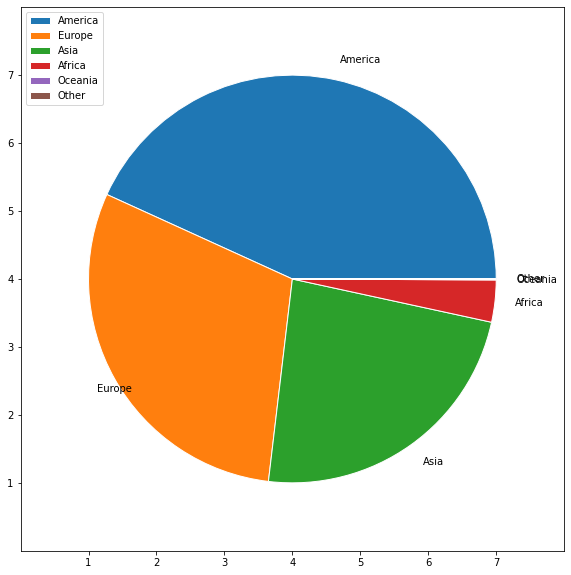

In [23]:
# plot des continents qui ont le plus grand nombre des cas 
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(df_c['cases'], radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"},labels=['America','Europe','Asia','Africa','Oceania','Other'], frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.legend()
plt.show()

In [16]:
df_c.sort_values('deaths', ascending=False)

,cases,deaths,moratlity_rate
continentExp,,,
America,30887593,785420,0.025428
Europe,21400012,479789,0.022420
Asia,16782046,290129,0.017288
Africa,2379827,56334,0.023671
Oceania,53440,1154,0.021594
Other,696,7,0.010057


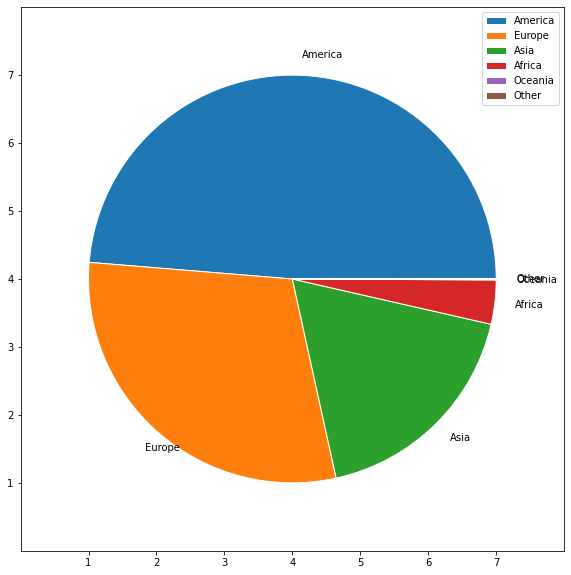

In [24]:
# plot des continents qui ont le plus grand nombre des morts
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(df_c['deaths'], radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, labels=['America','Europe','Asia','Africa','Oceania','Other'], frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.legend()
plt.show()